# Limits prediction

In [19]:
from astropy.io import ascii
import matplotlib.pyplot as plt
import numpy as np
from scipy.integrate import trapz
from scipy.interpolate import splrep, splev

In [20]:
# NFWmax model
mumu = ascii.read("../../dmbounds/bounds/cta/cta_2023_LMC_ann_mumu_sens_NFWmax.ecsv")
bb = ascii.read("../../dmbounds/bounds/cta/cta_2023_LMC_ann_bb_sens_NFWmax.ecsv")
tautau = ascii.read("../../dmbounds/bounds/cta/cta_2023_LMC_ann_tautau_sens_NFWmax.ecsv")
WW = ascii.read("../../dmbounds/bounds/cta/cta_2023_LMC_ann_WW_sens_NFWmax.ecsv")

In [21]:
# dN/dE data
dN_dE = ascii.read("AtProduction_gammas.dat")

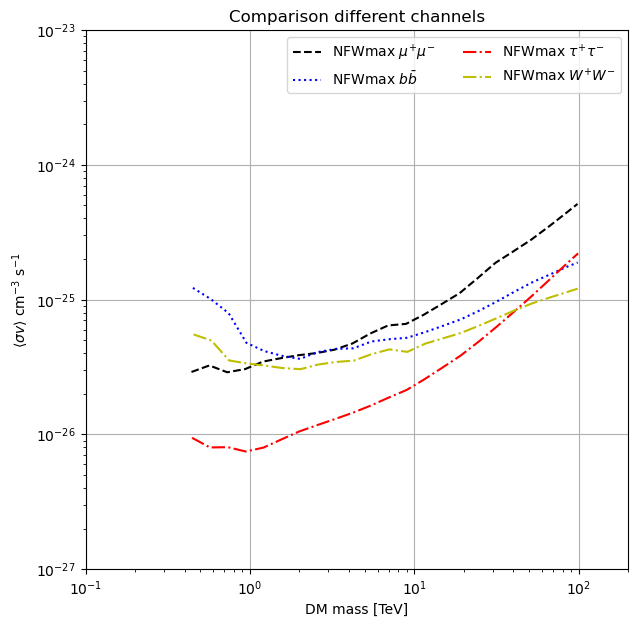

In [22]:
plt.figure(figsize=(7,7))
plt.xlabel("DM mass [TeV]")
plt.ylabel(r"$\langle\sigma v \rangle$ cm$^{-3}$ s$^{-1}$")
plt.xlim(1e-1,2e2)
plt.ylim(1e-27,1e-23)
plt.title(r'Comparison different channels')
plt.loglog(mumu['mass']*1e-3,mumu['sigmav'],color='k',linestyle='dashed',label=r"NFWmax $\mu^{+}\mu^{-}$")
plt.loglog(bb['mass']*1e-3,bb['sigmav'],color='b',linestyle='dotted',label=r"NFWmax $b\bar{b}$")
plt.loglog(tautau['mass']*1e-3,tautau['sigmav'],color='r',linestyle='dashdot',label=r"NFWmax $\tau^{+}\tau^{-}$")
plt.loglog(WW['mass']*1e-3,WW['sigmav'],color='y',linestyle='dashdot',label=r"NFWmax $W^{+}W^{-}$")


plt.legend(loc="best",ncol=2)
plt.grid()

# plt.savefig("compare_cta_NFWmax.eps")
# plt.savefig("compare_cta_NFWmax.pdf")
# plt.savefig("compare_cta_NFWmax.png")

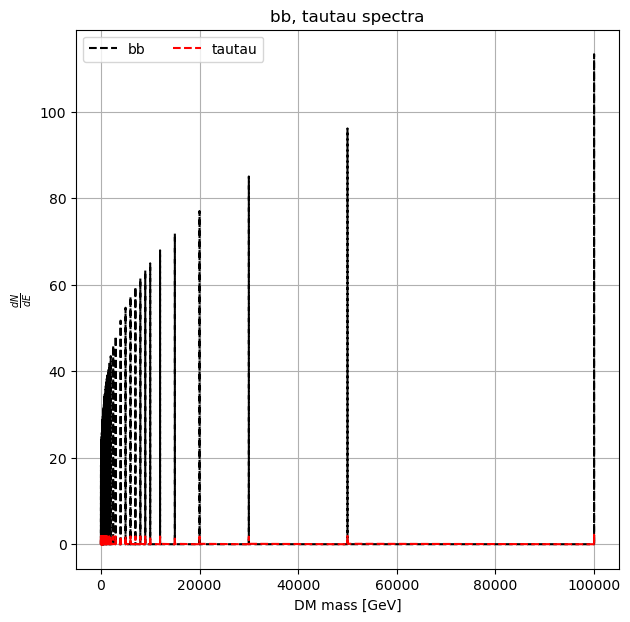

In [23]:
plt.figure(figsize=(7,7))
plt.xlabel("DM mass [GeV]")
plt.ylabel(r"$\frac{dN}{dE}$")
plt.title(r'bb, tautau spectra')

plt.plot(dN_dE['mDM'] + pow(10,dN_dE['Log[10,x]']),dN_dE['b'],color='k',linestyle='dashed', label="bb")
plt.plot(dN_dE['mDM'] + pow(10,dN_dE['Log[10,x]']),dN_dE['\[Tau]'],color='r',linestyle='dashed', label="tautau")


plt.legend(loc="best",ncol=2)
plt.grid()

In [29]:
# varible initialization

begin_channel = 'b'
predected_channel_1 = '\[Mu]'
predected_channel_2 = '\[Tau]'
predected_channel_3 = 'W'

begin_file = bb


# vector filled with sigmav predected

vector_predicted0 = []
vector_predicted1 = []
vector_predicted2 = []
vector_predicted3 = []


In [30]:
# do the ratio dN_begin / dN_end

def ratio (a, b):
    return a/b

In [31]:
# integrate dN/dE 

def integral (x_min, x_max, channel):
    select_events = (dN_dE['mDM'] + pow(10,dN_dE['Log[10,x]']) >= x_min) & (dN_dE['mDM'] + pow(10,dN_dE['Log[10,x]']) <= x_max)
    x_selected = (dN_dE['mDM'] + pow(10,dN_dE['Log[10,x]'])) [select_events]
    y_selected = dN_dE[channel][select_events]
    return trapz(y_selected, x_selected)

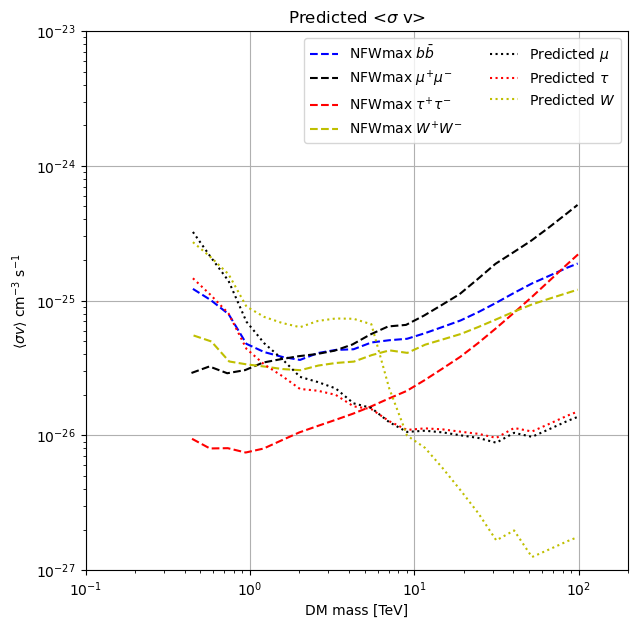

In [32]:
# vector filled with data

vector_mass_begin = begin_file['mass']
vector_sigmav_begin = begin_file['sigmav']


for x_begin, y_begin in zip(vector_mass_begin, vector_sigmav_begin):
    
    max_element = x_begin
    dN_begin = integral(0.0, max_element, begin_channel)
    dN_end1 = integral(0.0, max_element, predected_channel_1)
    dN_end2 = integral(0.0, max_element, predected_channel_2)
    dN_end3 = integral(0.0, max_element, predected_channel_3)
    
# Compute dN_begin / dN_end
    
    ratio0 = ratio(dN_begin, dN_begin)
    ratio1 = ratio(dN_begin, dN_end1)
    ratio2 = ratio(dN_begin, dN_end2)
    ratio3 = ratio(dN_begin, dN_end3)
    
# Compute sigmav predicted
    
    vector_predicted0.append(y_begin * ratio0)
    vector_predicted1.append(y_begin * ratio1)
    vector_predicted2.append(y_begin * ratio2)
    vector_predicted3.append(y_begin * ratio3)
    

plt.figure(figsize=(7,7))
plt.xlabel("DM mass [TeV]")
plt.ylabel(r"$\langle\sigma v \rangle$ cm$^{-3}$ s$^{-1}$")
plt.xlim(1e-1,2e2)
plt.ylim(1e-27,1e-23)
plt.title(r'Predicted <$\sigma$ v>')

plt.loglog(bb['mass']*1e-3,bb['sigmav'],color='b',linestyle='dashed',label=r"NFWmax $b\bar{b}$")
plt.loglog(mumu['mass']*1e-3,mumu['sigmav'],color='k',linestyle='dashed',label=r"NFWmax $\mu^{+}\mu^{-}$")
plt.loglog(tautau['mass']*1e-3,tautau['sigmav'],color='r',linestyle='dashed',label=r"NFWmax $\tau^{+}\tau^{-}$")
plt.loglog(WW['mass']*1e-3,WW['sigmav'],color='y',linestyle='dashed',label=r"NFWmax $W^{+}W^{-}$")

#plt.loglog(bb['mass']*1e-3,vector_predicted0,color='g',linestyle='dotted',label=r"Predicted $bb$")
plt.loglog(bb['mass']*1e-3,vector_predicted1,color='k',linestyle='dotted',label=r"Predicted $\mu$")
plt.loglog(bb['mass']*1e-3,vector_predicted2,color='r',linestyle='dotted',label=r"Predicted $\tau$")
plt.loglog(bb['mass']*1e-3,vector_predicted3,color='y',linestyle='dotted',label=r"Predicted $W$")

plt.legend(loc="best",ncol=2)
plt.grid()
